In [6]:
# Standard 
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
from pandas_datareader import data, wb

from numpy.random import randn 
from datetime import datetime

#stats
from scipy import stats
 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

import requests
from io import StringIO

In [7]:
 url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [17]:
#request to get info in text form 
source = requests.get(url).text

poll_data= StringIO(source)

In [18]:
poll_df= pd.read_csv(poll_data)

In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


<AxesSubplot:xlabel='Affiliation', ylabel='Count'>

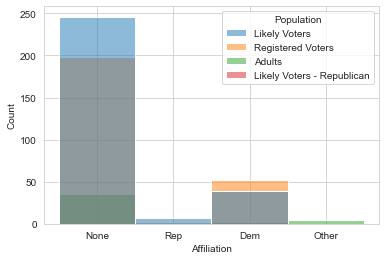

In [34]:
sns.histplot(data=poll_df,x='Affiliation',hue='Population')

In [38]:
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',axis=0, inplace=True)

In [40]:
#Standard deviation for the avgs
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0, inplace=True)

<AxesSubplot:>

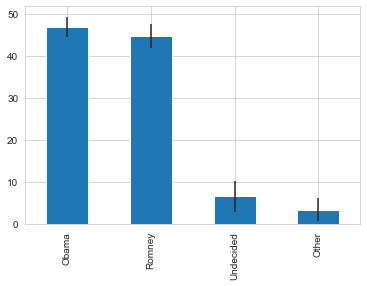

In [56]:
avg.plot(yerr=std,kind='bar',legend=False) #avg of all polls

In [54]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns= ['Average','STD']
poll_avg.drop('Question Text',axis=0, inplace=True)
poll_avg.drop('Question Iteration',axis=0, inplace=True)
poll_avg.drop('Other',axis=0, inplace=True)

In [55]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [57]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


<AxesSubplot:xlabel='End Date'>

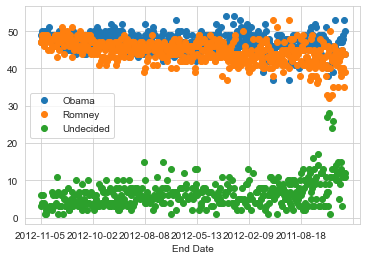

In [58]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [59]:
#plot the difference in percentage through time 
poll_df['Difference'] = (poll_df['Obama']-poll_df['Romney']) /100
# positive difference indicates Obama is in front in the polls /negative Romney 

In [60]:
poll_df


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.09
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.08
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.18
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.11


In [61]:
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean() #avg of polls in the particular date

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


<AxesSubplot:xlabel='Start Date'>

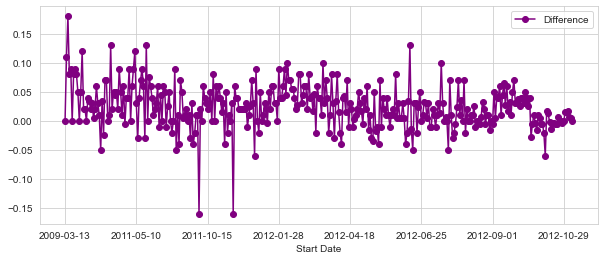

In [65]:
poll_df.plot(x='Start Date',y='Difference',figsize=(10,4),marker='o',linestyle='-',color='purple')

In [71]:
#debates zoom in 
row_index=0
xlimit=[]

for date in poll_df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_index)
        row_index+=1
    else:
         row_index+=1
print (min(xlimit))
print (max(xlimit))





325
352


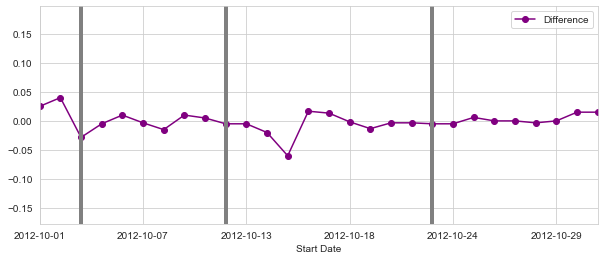

In [78]:
poll_df.plot(x='Start Date',y='Difference',figsize=(10,4),marker='o',linestyle='-',color='purple',xlim=(325,352))
#debates
plt.axvline(x=325+2,linewidth=4,color='grey')
plt.axvline(x=325+9,linewidth=4,color='grey')
plt.axvline(x=325+19,linewidth=4,color='grey')

In [81]:
#donor dataset 

donor_df = pd.read_csv('Election_Donor_Data.csv')

In [82]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [83]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [89]:
#avg donation amount 

donor_df['contb_receipt_amt'].value_counts()

donor_df_mean =donor_df['contb_receipt_amt'].mean()
donor_df_std =donor_df['contb_receipt_amt'].std


TypeError: must be real number, not method

In [96]:
top_donor = donor_df['contb_receipt_amt'].copy()


#remove negative refunds
#top donors 
top_donor = top_donor[top_donor>0]
top_donor.sort_values()
top_donor.value_counts().head(10)


100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

<AxesSubplot:>

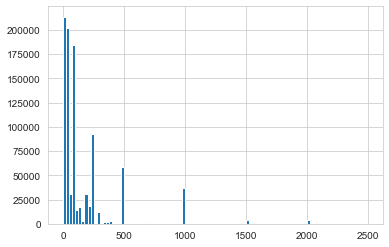

In [98]:
#common donations
com_don= top_donor[top_donor<2500]

com_don.hist(bins=100)

In [101]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [102]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [105]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [107]:
#total amount of donations 
donor_df.groupby('cand_nm')['contb_receipt_amt'].count() #how many people donated 




cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [119]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print (" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




<AxesSubplot:xlabel='cand_nm'>

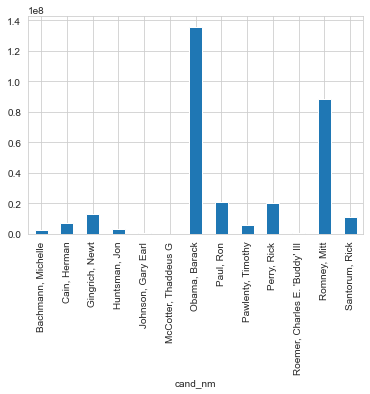

In [120]:
cand_amount.plot(kind='bar')

<AxesSubplot:xlabel='Party'>

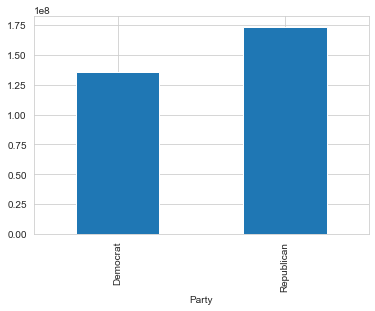

In [121]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [153]:
#where the donation come from 

occupation_df= donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns= 'Party',aggfunc='sum')

In [154]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [155]:
occupation_df.shape

(45067, 2)

In [156]:
# adding cutoff to the contibution 

occupation_df= occupation_df[occupation_df.sum(1)>1000000]

In [157]:
occupation_df.shape

(31, 2)

In [158]:
#remove occuaptions that are not or double 
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

/Users/markella/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='contbr_occupation'>

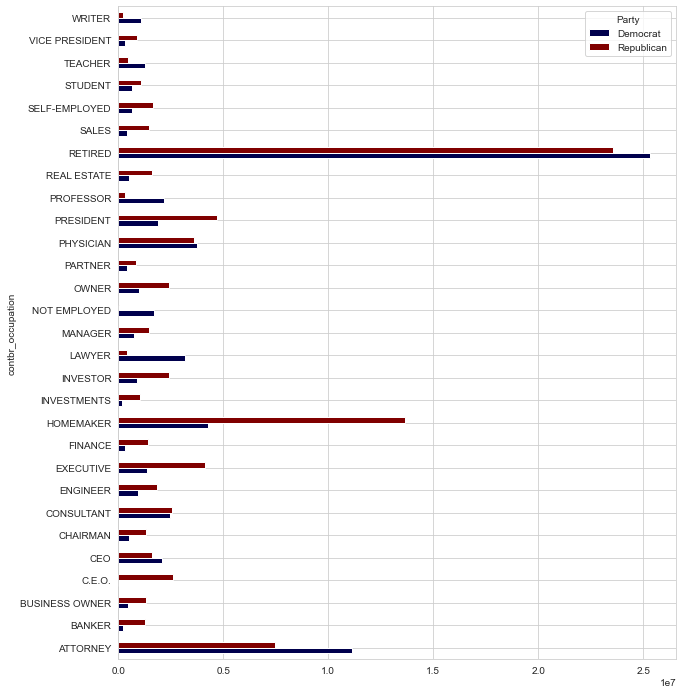

In [159]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic') 

In [160]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO']+ occupation_df.loc['C.E.O.']
occupation_df.drop('CEO',inplace=True)


/Users/markella/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/markella/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<AxesSubplot:ylabel='contbr_occupation'>

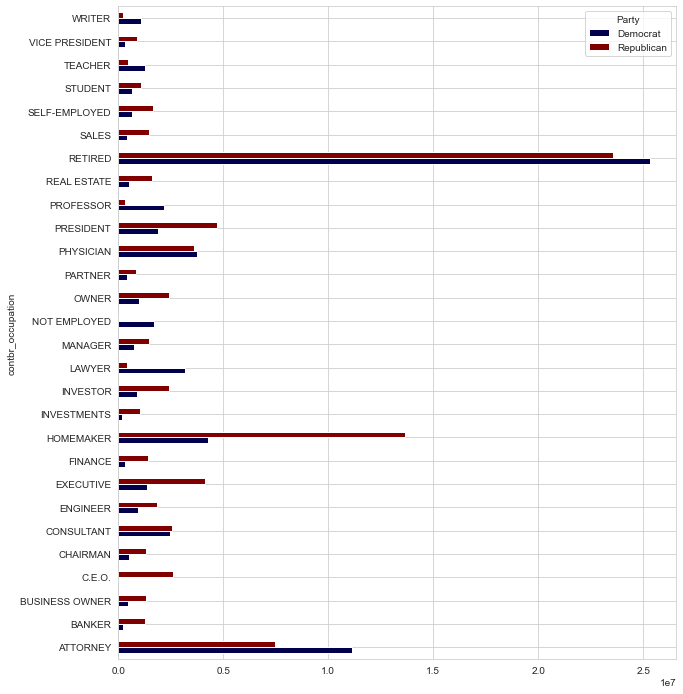

In [148]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic') 